In [1]:
!pip install pandas geopandas plotly pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 20.4 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 1.csv to 1.csv
Saving ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries.cpg
Saving ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries.dbf
Saving ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries.prj
Saving ne_110m_admin_0_countries.README.html to ne_110m_admin_0_countries.README.html
Saving ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries.shp
Saving ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx
Saving ne_110m_admin_0_countries.VERSION.txt to ne_110m_admin_0_countries.VERSION.txt
Saving tweetid_userid_keyword_topics_sentiments_emotions (5k sample).csv to tweetid_userid_keyword_topics_sentiments_emotions (5k sample).csv
Saving daily-new-confirmed-covid-19-cases-per-million-people.csv to daily-new-confirmed-covid-19-cases-per-million-people.csv


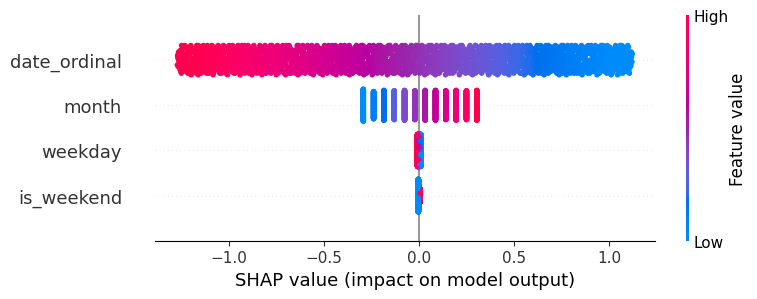

In [3]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the COVID-19 dataset
data = pd.read_csv('daily-new-confirmed-covid-19-cases-per-million-people.csv')

# Convert the 'Day' column to datetime format
data['Day'] = pd.to_datetime(data['Day'])

# Remove non-country entities from the dataset
non_countries = [
    "Africa", "Asia", "Asia excl. China", "European Union",
    "Europe", "High income", "Low income", "Lower middle income",
    "North America", "Oceania", "South America", "Upper middle income",
    "World", "European Union (27)", "High-income countries",
    "Low-income countries", "Lower-middle-income countries",
    "Upper-middle-income countries", "World excl. China",
    "World excl. China and South Korea",
    "World excl. China, South Korea, Japan and Singapore"
]
data = data[~data['Entity'].isin(non_countries)]

# Aggregate the data by date by computing the mean daily cases per million
time_distribution = data.groupby('Day')['Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'].mean().reset_index()
time_distribution.rename(columns={
    'Day': 'date',
    'Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)': 'daily_cases'
}, inplace=True)

# Extract time-based features
time_distribution['date_ordinal'] = time_distribution['date'].apply(lambda x: x.toordinal())
time_distribution['weekday'] = time_distribution['date'].dt.dayofweek
time_distribution['is_weekend'] = time_distribution['weekday'].apply(lambda x: 1 if x >= 5 else 0)
time_distribution['month'] = time_distribution['date'].dt.month

# Prepare the feature matrix (X) and the target variable (y) with log transformation
X = time_distribution[['date_ordinal', 'weekday', 'is_weekend', 'month']]
y = np.log1p(time_distribution['daily_cases'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_scaled_df, y)

# Create a SHAP explainer and calculate SHAP values
explainer = shap.Explainer(model, X_scaled_df)
shap_values = explainer(X_scaled_df)

# Plot the SHAP summary plot to show feature importance
shap.summary_plot(shap_values, X_scaled_df, feature_names=X.columns)

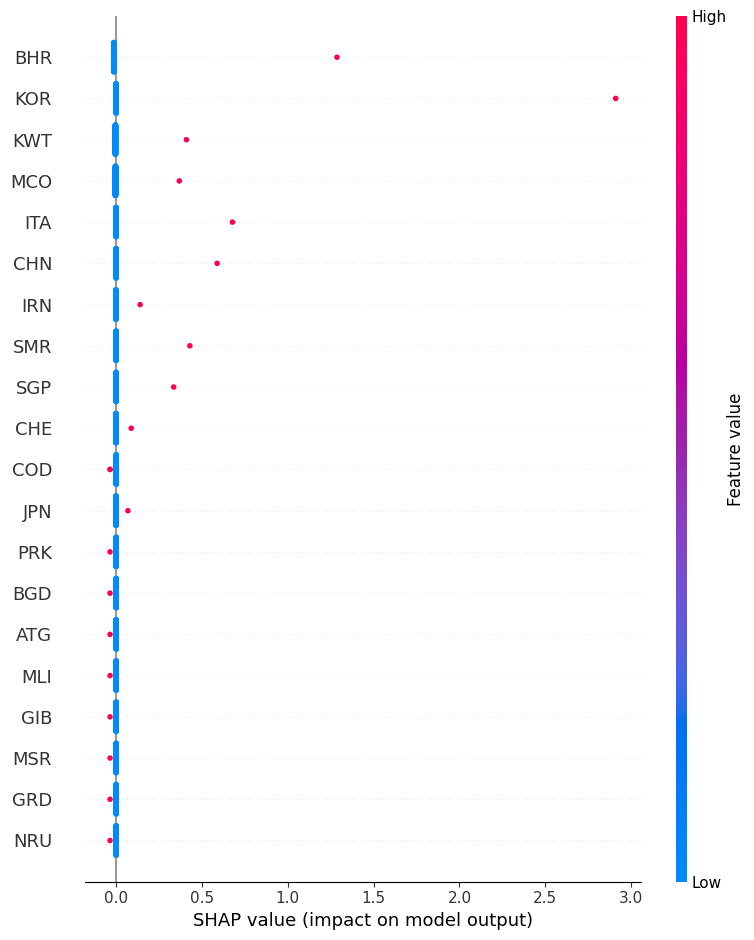

   ABW       AFG       AGO  AIA       ALB       AND  ARE       ARG  ARM  \
0 -0.0 -0.034224  0.000358 -0.0 -0.000000  0.000358  0.0  0.000358 -0.0   
1 -0.0 -0.000000  0.000358 -0.0 -0.035789  0.000358  0.0  0.000358 -0.0   
2 -0.0 -0.000000  0.000358 -0.0 -0.000000  0.000358  0.0  0.000358 -0.0   
3 -0.0 -0.000000  0.000358 -0.0 -0.000000  0.000358  0.0  0.000358 -0.0   
4 -0.0 -0.000000  0.000358 -0.0 -0.000000 -0.035431  0.0  0.000358 -0.0   

        ASM  ...  VNM  VUT  WLF  WSM       XKX  YEM       ZAF  ZMB       ZWE  \
0  0.000358  ... -0.0 -0.0 -0.0 -0.0  0.000358 -0.0  0.000358 -0.0  0.000358   
1  0.000358  ... -0.0 -0.0 -0.0 -0.0  0.000358 -0.0  0.000358 -0.0  0.000358   
2  0.000358  ... -0.0 -0.0 -0.0 -0.0  0.000358 -0.0  0.000358 -0.0  0.000358   
3 -0.035431  ... -0.0 -0.0 -0.0 -0.0  0.000358 -0.0  0.000358 -0.0  0.000358   
4  0.000358  ... -0.0 -0.0 -0.0 -0.0  0.000358 -0.0  0.000358 -0.0  0.000358   

   total_effect  
0     -0.025805  
1     -0.027370  
2     -0.02597

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import shap
import pycountry

# Load the COVID-19 dataset
data = pd.read_csv('daily-new-confirmed-covid-19-cases-per-million-people.csv')

# Convert the 'Day' column to datetime format
data['Day'] = pd.to_datetime(data['Day'])

# Remove non-country entities from the dataset
non_countries = [
    "Africa", "Asia", "Asia excl. China", "European Union",
    "Europe", "High income", "Low income", "Lower middle income",
    "North America", "Oceania", "South America", "Upper middle income",
    "World", "European Union (27)", "High-income countries",
    "Low-income countries", "Lower-middle-income countries",
    "Upper-middle-income countries", "World excl. China",
    "World excl. China and South Korea",
    "World excl. China, South Korea, Japan and Singapore"
]
data = data[~data['Entity'].isin(non_countries)]

# Define the date range for spatial aggregation (e.g., February 21 - February 29, 2020)
start_date = pd.to_datetime("2020-02-21")
end_date = pd.to_datetime("2020-02-29")
filtered_data = data[(data['Day'] >= start_date) & (data['Day'] <= end_date)]

# Aggregate data by country by computing the mean daily cases over the selected period
aggregated_data = filtered_data.groupby('Entity', as_index=False)[
    'Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'
].mean()
aggregated_data.rename(columns={
    'Entity': 'country_name',
    'Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)': 'avg_daily_cases'
}, inplace=True)

# Define manual country name corrections for ISO Alpha-3 codes
country_name_corrections = {
    "United States": "USA",
    "China": "CHN",
    "Russia": "RUS",
    "South Korea": "KOR",
    "Iran": "IRN",
    "Vietnam": "VNM",
    "Venezuela": "VEN",
    "Syria": "SYR",
    "Laos": "LAO",
    "Bolivia": "BOL",
    "Brunei": "BRN",
    "Congo": "COD",  # Democratic Republic of the Congo
    "Czechia": "CZE",  # Czech Republic
    "Taiwan": "TWN",
    "Tanzania": "TZA",
    "Vatican": "VAT",
    "Cote d'Ivoire": "CIV",
    "Cape Verde": "CPV",
    "Democratic Republic of Congo": "COD",
    "East Timor": "TLS",
    "Kosovo": "XKX",
    "Micronesia (country)": "FSM",
    "North Korea": "PRK",
    "Palestine": "PSE",
    "Reunion": "REU",
    "United States Virgin Islands": "VIR",
    "Bonaire Sint Eustatius and Saba": "BES",
    "Curacao": "CUW",
    "Falkland Islands": "FLK",
    "Saint Barthelemy": "BLM",
    "Saint Helena": "SHN"
}

# Function to convert country name to ISO Alpha-3 code
def convert_to_iso3(country_name):
    if country_name in country_name_corrections:
        return country_name_corrections[country_name]
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Apply conversion to get a new 'country_code' column
aggregated_data['country_code'] = aggregated_data['country_name'].apply(convert_to_iso3)
aggregated_data = aggregated_data.dropna(subset=['country_code'])

# Prepare the feature matrix and target variable for spatial SHAP analysis
# Use one-hot encoding for the 'country_code' feature
X = pd.get_dummies(aggregated_data['country_code'])
y = aggregated_data['avg_daily_cases']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Use SHAP to analyze feature importance
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Plot the SHAP summary plot
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X, feature_names=X.columns)

# (Optional) Create a DataFrame of SHAP values for further analysis
shap_values_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_values_df['total_effect'] = shap_values_df.sum(axis=1)
print(shap_values_df.head())

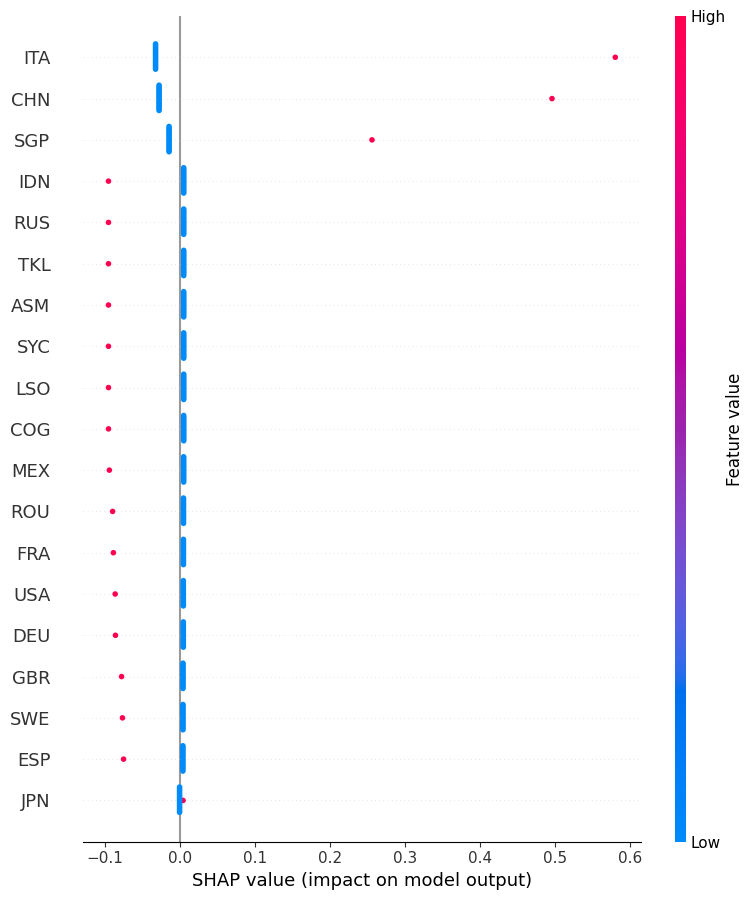

        ASM       CHN       COG       DEU       ESP       FRA       GBR  \
0 -0.095026 -0.027572  0.005279  0.004763  0.004161  0.004915  0.004311   
1  0.005279  0.496304  0.005279  0.004763  0.004161  0.004915  0.004311   
2  0.005279 -0.027572 -0.095026  0.004763  0.004161  0.004915  0.004311   
3  0.005279 -0.027572  0.005279  0.004763  0.004161 -0.088476  0.004311   
4  0.005279 -0.027572  0.005279 -0.085727  0.004161  0.004915  0.004311   

        IDN       ITA       JPN       LSO       MEX       ROU       RUS  \
0  0.005279 -0.032261 -0.000248  0.005279  0.005214  0.004974  0.005279   
1  0.005279 -0.032261 -0.000248  0.005279  0.005214  0.004974  0.005279   
2  0.005279 -0.032261 -0.000248  0.005279  0.005214  0.004974  0.005279   
3  0.005279 -0.032261 -0.000248  0.005279  0.005214  0.004974  0.005279   
4  0.005279 -0.032261 -0.000248  0.005279  0.005214  0.004974  0.005279   

        SGP       SWE       SYC       TKL       USA  total_effect  
0 -0.014239  0.004244  0.00527

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LinearRegression
import pycountry

# Load the COVID-19 dataset
data = pd.read_csv('daily-new-confirmed-covid-19-cases-per-million-people.csv')

# Convert the 'Day' column to datetime format
data['Day'] = pd.to_datetime(data['Day'])

# Remove non-country entities from the dataset
non_countries = [
    "Africa", "Asia", "Asia excl. China", "European Union", "Europe", "High income",
    "Low income", "Lower middle income", "North America", "Oceania", "South America",
    "Upper middle income", "World", "European Union (27)", "High-income countries",
    "Low-income countries", "Lower-middle-income countries", "Upper-middle-income countries",
    "World excl. China", "World excl. China and South Korea", "World excl. China, South Korea, Japan and Singapore"
]
data = data[~data['Entity'].isin(non_countries)]

# Define the date range for analysis (e.g., February 21 - February 29, 2020)
start_date = pd.to_datetime("2020-02-21")
end_date = pd.to_datetime("2020-02-29")
filtered_data = data[(data['Day'] >= start_date) & (data['Day'] <= end_date)]

# Aggregate data by country by calculating the mean daily cases over the selected period
aggregated_data = filtered_data.groupby('Entity', as_index=False)[
    'Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'
].mean()
aggregated_data.rename(columns={
    'Entity': 'country_name',
    'Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)': 'avg_daily_cases'
}, inplace=True)

# Define manual country name corrections to obtain ISO Alpha-3 codes
country_name_corrections = {
    "United States": "USA",
    "China": "CHN",
    "Russia": "RUS",
    "South Korea": "KOR",
    "Iran": "IRN",
    "Vietnam": "VNM",
    "Venezuela": "VEN",
    "Syria": "SYR",
    "Laos": "LAO",
    "Bolivia": "BOL",
    "Brunei": "BRN",
    "Congo": "COG",  # Use COG for Congo as specified
    "Czechia": "CZE",
    "Taiwan": "TWN",
    "Tanzania": "TZA",
    "Vatican": "VAT",
    "Cote d'Ivoire": "CIV",
    "Cape Verde": "CPV",
    "Democratic Republic of Congo": "COD",
    "East Timor": "TLS",
    "Kosovo": "XKX",
    "Micronesia (country)": "FSM",
    "North Korea": "PRK",
    "Palestine": "PSE",
    "Reunion": "REU",
    "United States Virgin Islands": "VIR",
    "Bonaire Sint Eustatius and Saba": "BES",
    "Curacao": "CUW",
    "Falkland Islands": "FLK",
    "Saint Barthelemy": "BLM",
    "Saint Helena": "SHN",
    "Western Sahara": "ESH"  # Added for Western Sahara
}

# Function to convert country name to ISO Alpha-3 code using manual corrections and pycountry
def convert_to_iso3(country_name):
    if country_name in country_name_corrections:
        return country_name_corrections[country_name]
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Apply the conversion function to get a new 'country_code' column
aggregated_data['country_code'] = aggregated_data['country_name'].apply(convert_to_iso3)
aggregated_data = aggregated_data.dropna(subset=['country_code'])

# Define the list of selected country codes
selected_country_codes = ['USA', 'CHN', 'ESP', 'FRA', 'ITA', 'DEU', 'GBR', 'JPN', 'IDN', 'MEX',
                          'SWE', 'SGP', 'ROU', 'RUS', 'COG', 'ESH', 'TKL', 'ASM', 'LSO', 'SYC']

# Filter the aggregated data to include only the selected countries
aggregated_data = aggregated_data[aggregated_data['country_code'].isin(selected_country_codes)]

# Prepare the feature matrix and target variable
# Use one-hot encoding for the 'country_code' feature
X = pd.get_dummies(aggregated_data['country_code'])
y = aggregated_data['avg_daily_cases']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a SHAP explainer and calculate SHAP values for the feature matrix
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Plot the SHAP summary plot to show feature importance
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X, feature_names=X.columns)

# (Optional) Create a DataFrame for SHAP values details and print the head
shap_values_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_values_df['total_effect'] = shap_values_df.sum(axis=1)
print(shap_values_df.head())

In [7]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=41659.861, Time=2.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=42774.003, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=42071.186, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=42409.912, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=41661.169, Time=1.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=41654.307, Time=1.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=42285.412, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=41609.381, Time=2.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=41606.057, Time=2.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=41660.604, Time=2.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=41597.186, Time=3.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=41651.736, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0]             : AIC=41557.713, Time=1.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=41629.361, Time=0.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=41536.641, Time=4.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=5.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,4)(0,0,0)[0]             : AIC=41502.270, Time=3.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0]             : AIC=41502.871, Time=2.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,5)(0,0,0)[0]             : AIC=41374.289, Time=7.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,5)(0,0,0)[0]             : AIC=41502.880, Time=2.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=41419.211, Time=7.07 sec

Best model:  ARIMA(5,0,5)(0,0,0)[0]          
Total fit time: 52.612 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


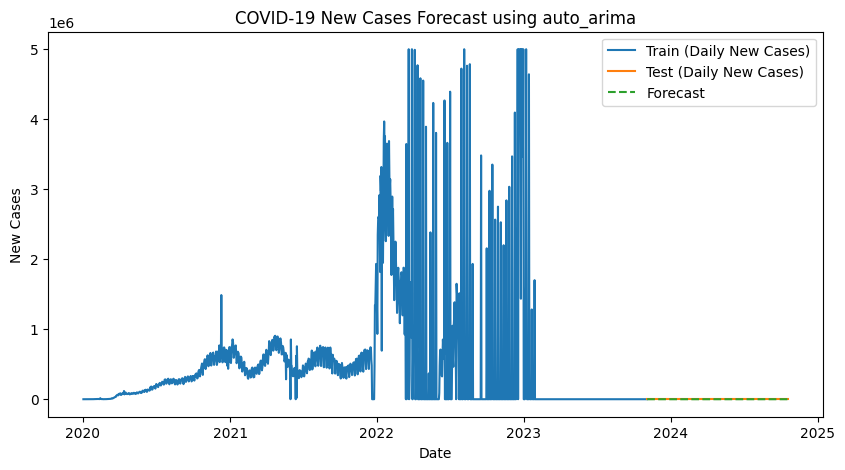

RMSE: 0.55


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

# -----------------------------
# A) Data reading and basic cleaning
# -----------------------------
data = pd.read_csv('1.csv', low_memory=False)
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.dropna(subset=['date'], inplace=True)

# Make sure 'confirmed' is numeric
data['confirmed'] = pd.to_numeric(data['confirmed'], errors='coerce')
data.dropna(subset=['confirmed'], inplace=True)

# Group by date, summing confirmed cases
grouped = data.groupby('date')['confirmed'].sum().reset_index()

# Reindex to daily frequency (fill missing days with 0)
grouped = grouped.set_index('date').asfreq('D', fill_value=0)

# Sort by date ascending (just in case)
grouped.sort_index(inplace=True)

# ------------------------------------------------
# B) Force cumulative confirmed to be non-decreasing
# ------------------------------------------------
# If the original 'confirmed' is truly "cumulative" but has corrections
# that make it drop on certain days, we fix that by making sure each day
# is at least as large as the previous day.

cleaned_confirmed = []
previous_val = 0
for val in grouped['confirmed']:
    if val < previous_val:
        # If today's cumulative is less than yesterday's, set it to yesterday's
        cleaned_confirmed.append(previous_val)
    else:
        cleaned_confirmed.append(val)
    previous_val = cleaned_confirmed[-1]

grouped['confirmed_cleaned'] = cleaned_confirmed

# Now we convert to daily new cases by differencing
grouped['new_cases'] = grouped['confirmed_cleaned'].diff().fillna(grouped['confirmed_cleaned'].iloc[0])

# ----------------------------------------------
# C) Optional outlier handling
# ----------------------------------------------
# If there are extremely large jumps that are obviously outliers,
# we can clamp them. Here is a simple example:
max_reasonable = 5_000_000  # You may adjust based on your domain knowledge
grouped.loc[grouped['new_cases'] > max_reasonable, 'new_cases'] = max_reasonable

# ----------------------------------------------
# D) Split into train/test (cover full timespan)
# ----------------------------------------------
# For demonstration, use 80% of the timeline as training, 20% as testing
split_idx = int(len(grouped) * 0.8)
train = grouped.iloc[:split_idx]['new_cases']
test = grouped.iloc[split_idx:]['new_cases']

# (Optional) Log transform if the values vary drastically:
# train = np.log1p(train)
# test = np.log1p(test)

# ----------------------------------------------
# E) Fit auto_arima
# ----------------------------------------------
model = pm.auto_arima(
    train,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    seasonal=False,
    d=None,
    test='adf',
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

model.fit(train)

# Forecast over the test set length
n_test = len(test)
forecast = model.predict(n_periods=n_test)
forecast_index = test.index
forecast_series = pd.Series(forecast, index=forecast_index)

# If you used log transform above, don't forget to do:
# forecast_series = np.expm1(forecast_series)
# test = np.expm1(test)

# ----------------------------------------------
# F) Plot the results
# ----------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train (Daily New Cases)')
plt.plot(test.index, test, label='Test (Daily New Cases)')
plt.plot(forecast_series.index, forecast_series, label='Forecast', linestyle='--')
plt.title('COVID-19 New Cases Forecast using auto_arima')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

# ----------------------------------------------
# G) Evaluate with RMSE
# ----------------------------------------------
rmse = np.sqrt(np.mean((forecast_series - test)**2))
print(f'RMSE: {rmse:.2f}')

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


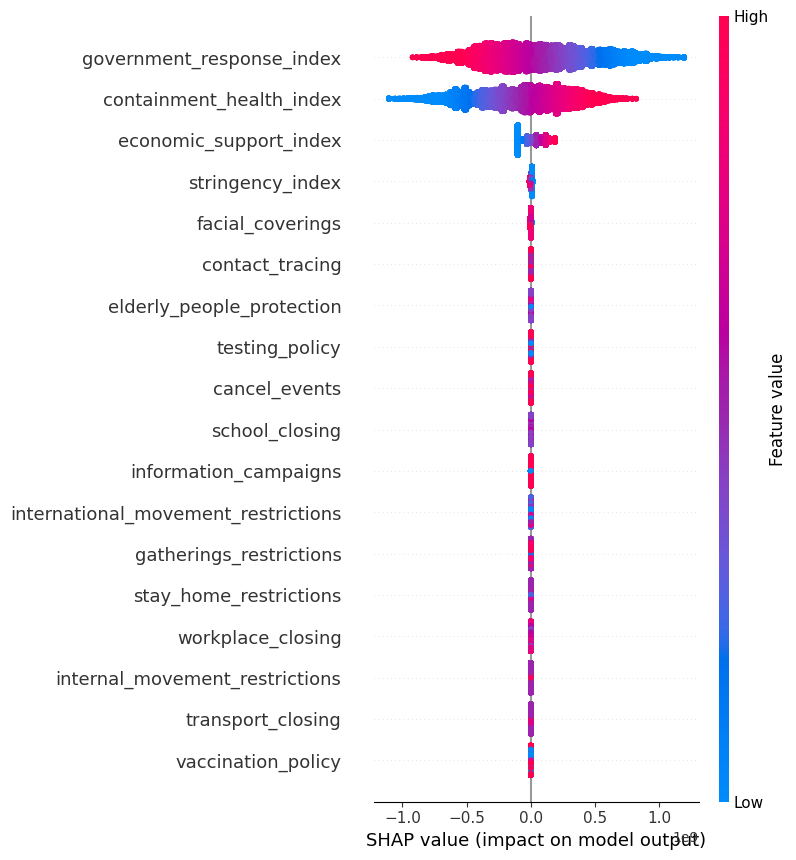

In [9]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset (assume the CSV file contains the necessary columns)
data = pd.read_csv('1.csv', low_memory=False)

# Optional: Remove extra spaces in column names
data.columns = data.columns.str.strip()

# Define the target variable and feature list.
# In this example, we use 'confirmed' as the epidemic outcome.
target_col = 'confirmed'
policy_features = [
    'school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions',
    'transport_closing', 'stay_home_restrictions', 'internal_movement_restrictions',
    'international_movement_restrictions', 'information_campaigns', 'testing_policy',
    'contact_tracing', 'facial_coverings', 'vaccination_policy', 'elderly_people_protection',
    'government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index'
]

# Convert target and features to numeric if necessary; coerce errors to NaN
data[target_col] = pd.to_numeric(data[target_col], errors='coerce')
for col in policy_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values in target or features
data_clean = data.dropna(subset=[target_col] + policy_features)

# For demonstration, you may want to aggregate data by country or date,
# but here we directly use each record as a sample.

# Optionally, you can filter out extremely low or zero confirmed cases if needed
# data_clean = data_clean[data_clean[target_col] > 0]

# Define feature matrix X and target y
X = data_clean[policy_features]
y = data_clean[target_col]

# Split data into training and testing sets (for demonstration; alternatively, the full dataset can be used)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use SHAP to explain the model's output.
# For a linear regression model, we can use shap.LinearExplainer.
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary plot to show feature importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train, feature_names=policy_features)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


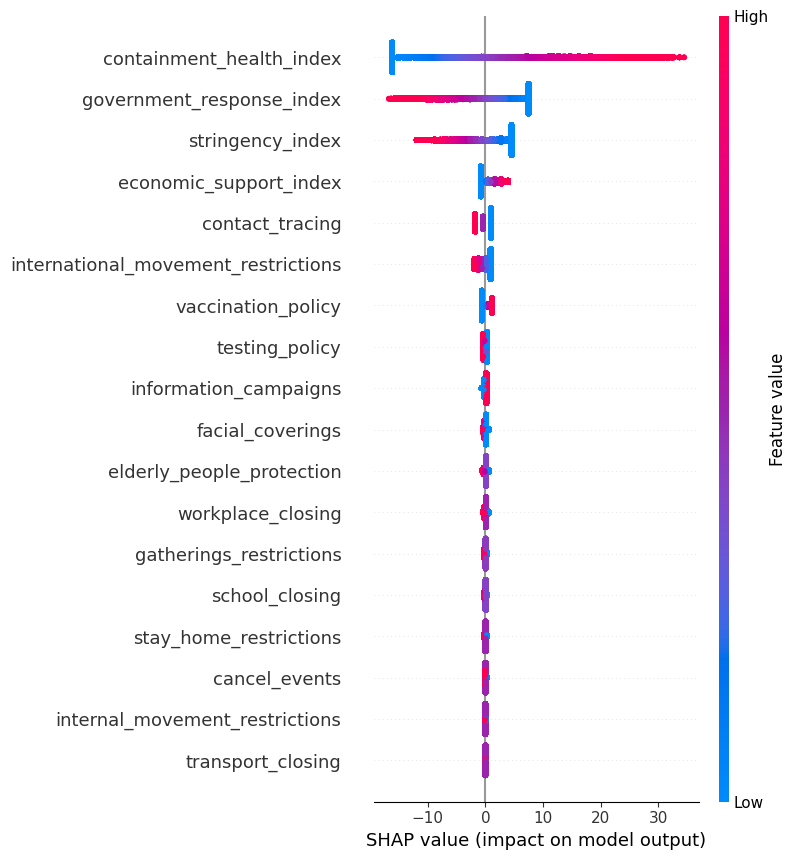

In [10]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset from "1.csv"
data = pd.read_csv('1.csv', low_memory=False)

# Remove extra spaces in column names
data.columns = data.columns.str.strip()

# Define the target variable and list of policy features.
# The target variable is the cumulative confirmed cases, 'confirmed'
target_col = 'confirmed'
policy_features = [
    'school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions',
    'transport_closing', 'stay_home_restrictions', 'internal_movement_restrictions',
    'international_movement_restrictions', 'information_campaigns', 'testing_policy',
    'contact_tracing', 'facial_coverings', 'vaccination_policy', 'elderly_people_protection',
    'government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index'
]

# Convert target and policy features to numeric and fill missing values.
# For the target variable, missing values are filled with 0.
data[target_col] = pd.to_numeric(data[target_col], errors='coerce').fillna(0)
for col in policy_features:
    # Assume that missing policy data means no policy (fill with 0)
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

# Apply log transformation to the target variable to reduce the influence of extreme values.
# Use log(1 + confirmed) to avoid issues with log(0)
data['log_confirmed'] = np.log1p(data[target_col])

# For demonstration, use each record as a sample.
# Use policy features as predictors (X) and the log-transformed confirmed cases as the target (y).
X = data[policy_features]
y = data['log_confirmed']

# Split data into training and testing sets for model interpretation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model on the log-transformed target.
model = LinearRegression()
model.fit(X_train, y_train)

# Use SHAP LinearExplainer to explain the model's output.
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary plot to show feature importance.
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train, feature_names=policy_features)